# Analyzing historical age trends of fantasy football players by position:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Create DataFrame of all qualified players, then separate by position:

In [2]:
qual = pd.read_csv("../data/qualified_sts.csv")
qb_qual = qual[qual['Pos']=='QB'].pivot(index='ID',columns='Age',values='PPR')
rb_qual = qual[qual['Pos']=='RB'].pivot(index='ID',columns='Age',values='PPR')
wr_qual = qual[qual['Pos']=='WR'].pivot(index='ID',columns='Age',values='PPR')
te_qual = qual[qual['Pos']=='TE'].pivot(index='ID',columns='Age',values='PPR')

# Determine age trends for each position by calculating 2nd degree polynomial regression lines of the highest scorer at each age by position:

array([-0.48966718, 27.72300052, -1.52843137])

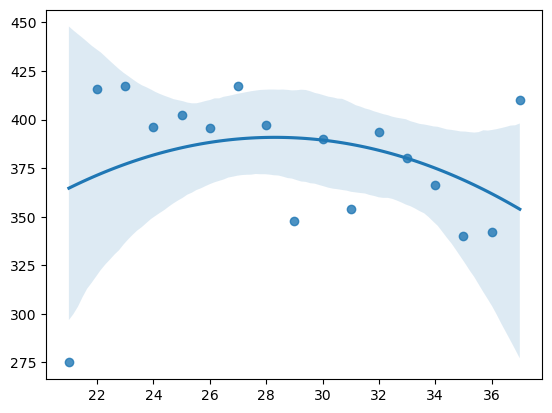

In [3]:
y = []
for i in range(21,38,1):
    y.append(qb_qual[i].quantile(q=1))
x = list(range(21,38,1))
qb = np.polyfit(x,y,2)
sns.regplot(x=x,y=y,order=2)
qb

array([   -3.90809191,   198.58421578, -2073.16923077])

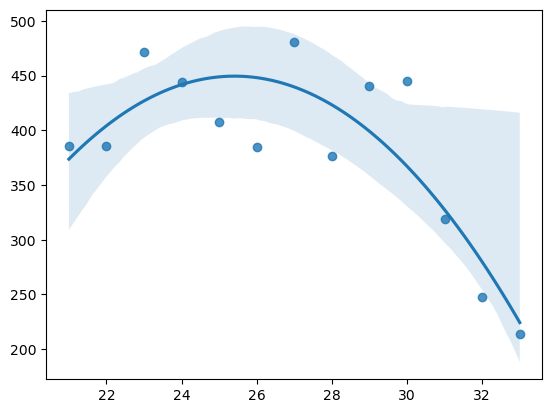

In [4]:
y = []
for i in range(21,34,1):
    y.append(rb_qual[i].quantile(q=1))
x = list(range(21,34,1))
rb = np.polyfit(x,y,2)
sns.regplot(x=x,y=y,order=2)
rb

array([   -2.14429945,   115.9584478 , -1185.81456044])

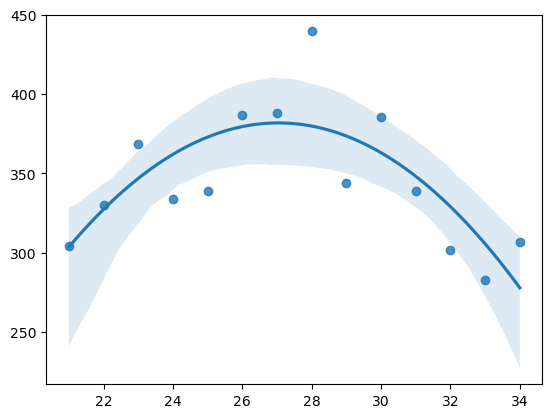

In [5]:
y = []
for i in range(21,35,1):
    y.append(wr_qual[i].quantile(q=1))
x = list(range(21,35,1))
wr = np.polyfit(x,y,2)
sns.regplot(x=x,y=y,order=2)
wr

array([  -1.30576625,   74.63615841, -771.2254902 ])

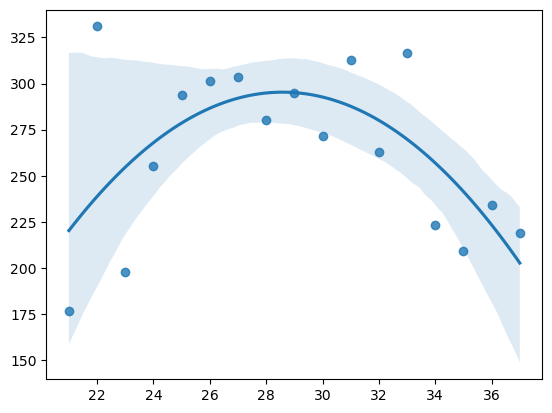

In [6]:
y = []
for i in range(21,38,1):
    y.append(te_qual[i].quantile(q=1))
x = list(range(21,38,1))
te = np.polyfit(x,y,2)
sns.regplot(x=x,y=y,order=2)
te

Conclusion: As expected, quarterbacks maintain their level of play the longest, with tight ends also showing consistency into their 30s. Wide receivers peak in their late 20s and regress in their low to mid 30s, while running backs peak in their low to mid 20s and quickly regress as they reach 30.

# Based on regression calculations, predict highest score at each age by position: 

In [7]:
trends = pd.DataFrame()
trends['Age'] = range(21,40)
trends['QB'] = qb[0]*(trends['Age']**2) + qb[1]*trends['Age'] + qb[2]
trends['RB'] = rb[0]*(trends['Age']**2) + rb[1]*trends['Age'] + rb[2]
trends['WR'] = wr[0]*(trends['Age']**2) + wr[1]*trends['Age'] + wr[2]
trends['TE'] = te[0]*(trends['Age']**2) + te[1]*trends['Age'] + te[2]
trends = trends.set_index('Age')
trends

,QB,RB,WR,TE
Age,,,,
21,364.711352,373.630769,303.676786,220.290918
22,371.378664,404.167033,327.430357,238.779128
23,377.066641,426.887113,346.895330,254.655805
24,381.775284,441.791009,362.071703,267.920949
25,385.504592,448.878721,372.959478,278.574561
26,388.254567,448.150250,379.558654,286.616641
27,390.025206,439.605594,381.869231,292.047188
28,390.816512,423.244755,379.891209,294.866202
29,390.628483,399.067732,373.624588,295.073684


# Convert predictions to percentages of max score by position:

In [8]:
trends_perc = trends
trends_perc['QB'] = trends['QB']/max(trends['QB'])
trends_perc['RB'] = trends['RB']/max(trends['RB'])
trends_perc['WR'] = trends['WR']/max(trends['WR'])
trends_perc['TE'] = trends['TE']/max(trends['TE'])
trends_perc

,QB,RB,WR,TE
Age,,,,
21,0.933204,0.832365,0.795238,0.746562
22,0.950263,0.900392,0.857441,0.809219
23,0.964818,0.951008,0.908414,0.863024
24,0.976866,0.984210,0.948156,0.907980
25,0.986408,1.000000,0.976668,0.944085
26,0.993445,0.998377,0.993949,0.971339
27,0.997975,0.979342,1.000000,0.989743
28,1.000000,0.942893,0.994820,0.999297
29,0.999519,0.889032,0.978410,1.000000
